# 2. Scientific calculations in Python: `numpy`, `matplotlib` and `scipy` libraries

While Python has a rich set of modules and data types by default, for numerical computing you'll be using two main libraries that conform the backbone of the [Python scientific stack](https://scipy.org/about.html). These libraries implement a great deal of functionality related to mathematical operations and efficient computations on large data volumes. These libraries are [`numpy`](http://numpy.org) and [`scipy`](http://scipy.org). `numpy` deals with efficient arrays, similar to lists, that simplify many common processing operations. Of course, just doing calculations isn't much fun if you can't plot some results. To do this, we use the [`matplotlib`](http://matplotlib.org) library.

But first, we'll see the concept of *functions*....


## 2.1 Functions

A function is a collection of Python statements that do something (usually on some data). For example, you may want to convert from Fahrenheit to Centigrade. The conversion is 

$$
^{\circ}C = \left(^{\circ}F -32\right)\cdot\frac{5}{9}
$$

A Python function will have a name (and we hope that the name is self-explanatory as to what the function does), and a set of input parameters. In the case above, the function would look like this:


In [1]:
def fahrenheit_to_centigrade(deg_fahrenheit):
    """A function to convert from degrees Fahrenheit to degrees Centigrade
    
    Parameters
    ----------
    deg_fahrenheit: float
        Temperature in degrees F
    
    Returns
    -------
    Temperature converted to degrees C
    """
    deg_c = (deg_fahrenheit - 32.)*5./9.
    return deg_c
    

We see that the function has a name (`fahrenheit_to_centigrade`), and takes one parameter (`deg_fahrenheit`). The main body of the function is indented (like `if` and `for` statements). There is first a comment string, that describes what the function does, as well as what the inputs are, and what the output is. This is just useful documentation of the code. The main body of the function calculates `deg_C` from the given input, and **returns** it back to the user. This is how this works:

In [2]:
for deg_F in [-40, -30, -20, -10, 0, 10, 50, 100]:
    conv_temp = fahrenheit_to_centigrade(deg_F)
    print(f"{deg_F:f} degrees F is {conv_temp:f} degrees C")


-40.000000 degrees F is -40.000000 degrees C
-30.000000 degrees F is -34.444444 degrees C
-20.000000 degrees F is -28.888889 degrees C
-10.000000 degrees F is -23.333333 degrees C
0.000000 degrees F is -17.777778 degrees C
10.000000 degrees F is -12.222222 degrees C
50.000000 degrees F is 10.000000 degrees C
100.000000 degrees F is 37.777778 degrees C


Functions are a very useful way of modularising code: rather than copying and pasting blocks of code, you can just bundle the code in a function and re-use it. This allows you to test the function and have some confidence that whenever you use the function again, it will work.

Note the use of [formatted string literals](https://www.python-course.eu/python3_formatted_output.php) in this example, the `f` here in the `print(f"{expression}")` statement. This is new to Python 3.6, and evaluates `expression` at run time.

It is important to understand that inside a function block, the variable names defined **within the function block** aren't shared with the outside world. In our previous example, we cannot access `deg_c` outside the function (try `print(deg_c`). **However**, Python will make use of variables defined on the main scope (e.g. outside the function block). It's a good idea to assume that all variables you need are either internal (e.g. calculated inside the code block), or else they should be passed as input parameters.

In some cases, you might want to set some optional input parameters. If the user doesn't give a value for this, a default value will be used. Let's see an example. What we want now is a function that converts **to** and **from** F to C. By default, it will convert `F->C`, but you can specify an optional input parameter `convert_to_c` to go `C->F`:

In [3]:
def convert_temperature_units(degrees_in, convert_to_c=True):
    """A function to convert from temperature. 
    
    Parameters
    ----------
    deg_in: float
        Temperature in degrees F
    convert_to_c: boolean
        if `True`, converts from F to C, if `False`, it 
        converts from C to F
    
    Returns
    -------
    Converted temperature
    """
    if convert_to_c:
        deg_converted = (degrees_in - 32.)*5./9.
    else:
        deg_converted = degrees_in*9/5. + 32.
    return deg_converted


for deg_F in [-40, -30, -20, -10, 0, 10, 50, 100]:
    conv_temp = convert_temperature_units(deg_F)
    print(f"{deg_F:f} degrees F is {conv_temp:f} degrees C")
print("*"*40)

for deg_C in [-40, -34.4, -28.88, -23.333, -17.778, -12.22, 10., 37.78]:
    conv_temp = convert_temperature_units(deg_C, convert_to_c=False)
    print(f"{deg_C:f} degrees C is {conv_temp:f} degrees F")

    

-40.000000 degrees F is -40.000000 degrees C
-30.000000 degrees F is -34.444444 degrees C
-20.000000 degrees F is -28.888889 degrees C
-10.000000 degrees F is -23.333333 degrees C
0.000000 degrees F is -17.777778 degrees C
10.000000 degrees F is -12.222222 degrees C
50.000000 degrees F is 10.000000 degrees C
100.000000 degrees F is 37.777778 degrees C
****************************************
-40.000000 degrees C is -40.000000 degrees F
-34.400000 degrees C is -29.920000 degrees F
-28.880000 degrees C is -19.984000 degrees F
-23.333000 degrees C is -9.999400 degrees F
-17.778000 degrees C is -0.000400 degrees F
-12.220000 degrees C is 10.004000 degrees F
10.000000 degrees C is 50.000000 degrees F
37.780000 degrees C is 100.004000 degrees F


Notice that the document string `"""A function to convert from temperature... """` is what is printed when you request `help` on the function:

In [4]:
help(convert_temperature_units)

Help on function convert_temperature_units in module __main__:

convert_temperature_units(degrees_in, convert_to_c=True)
    A function to convert from temperature. 
    
    Parameters
    ----------
    deg_in: float
        Temperature in degrees F
    convert_to_c: boolean
        if `True`, converts from F to C, if `False`, it 
        converts from C to F
    
    Returns
    -------
    Converted temperature



**E2.1.1 Exercise**

* In the vein of converting units, write functions that convert from

    * inches to m (and back)
    * kg to stones (and back)

Hint: A stone is equal to 14 pounds, and a pound is equal to 0.45359237 kg.

**Ensure** that your functions are clearly named, have sensible variable names, a brief docmentation string, and remember to test the functions work: just demonstrate running the function with some input pairs where you know the output and checking it makese sense.

In [5]:
# Space for your solution


## 2.2 `numpy`

You import the `numpy` library using

    import numpy as np
    
This means that all the functionality of `numpy` is accessed by the prefix `np.`: e.g. `np.array`. The main element of `numpy` is the numpy array. An array is like a list, but unlike a list, all the elements are of the same type, floating point numbers for example. 

Let's see some arrays in action...

In [6]:
import numpy as np  # Import the numpy library

# An array with 5 ones
arr = np.ones(5)
print(arr)
print(type(arr))

# An array started from a list of **integers**
arr = np.array([1, 2, 3, 4])
print(arr)

# An array started from a list of numbers, what's the difference??
arr = np.array([1., 2, 3, 4])
print(arr)

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
[1 2 3 4]
[1. 2. 3. 4.]


In the example above we have generated an array where all the elements are `1.0`, using [`np.ones`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), and then we have been able to generate arrays from lists using the [`np.array`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) function. The difference between the 2nd and 3rd examples is that in the 2nd example, all the elements of the list are integers, and in the 3rd example, one is a floating point number. `numpy` automatically makes the array floating point by converting the integers to floating point numbers.

What can we do with arrays? We can efficiently operate on individual elements without loops:

In [7]:
arr = np.ones(10)
print(2 * arr)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


`numpy` is clever enough to figure out that the 2 multiplying the array is applied to all elements of the array, and returns an array of the same size as `arr` with the elements of `arr` multiplied by 2. We can also multiply two arrays of the same size. So let's create an array with the numbers 0 to 9 and one with the numbers 9 to 0 and do a times table:

In [8]:
arr1 = 9 * np.ones(10)
arr2 = np.arange(1, 11)  # arange gives an array from 1 to 11, 11 not included

print(arr1)
print(arr2)

print(arr1 * arr2)

[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
[ 1  2  3  4  5  6  7  8  9 10]
[ 9. 18. 27. 36. 45. 54. 63. 72. 81. 90.]


**E2.2.1 Exercise**

* Using code similar to the above and a `for` loop, write the times tables for 2 to 10. The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]

In [9]:
# Your solution here

If the arrays are of the same *shape*, you can do standard operations between them **element-wise**:

In [10]:
arr1 = np.array([3, 4, 5, 6.])
arr2 = np.array([30, 40, 50, 60.])

print(arr2 - arr1)
print(arr1 * arr2)

print("Array shapes:")
print("arr1: ", arr1.shape)
print("arr2: ", arr2.shape)

[27. 36. 45. 54.]
[ 90. 160. 250. 360.]
Array shapes:
arr1:  (4,)
arr2:  (4,)


The `numpy` documenation is huge. There's an [user's guide](https://docs.scipy.org/doc/numpy/user/index.html), as well as a reference to all the [contents of the library](https://docs.scipy.org/doc/numpy/reference/index.html). There's even [a tutorial availabe](https://docs.scipy.org/doc/numpy/user/quickstart.html) if you get bored with this one.

### More detail about `numpy.arrays` 

So far, we have seen a 1D array, which is the equivalent to a vector. But arrays can have more dimensions: a 2D array would be equivalent to a matrix (or an image, with rows and columns), and a 3D array would be a volume split into voxels, as seen below


![numpy arrays](https://cdn-images-1.medium.com/max/1120/1*Ikn1J6siiiCSk4ivYUhdgw.png)

So a 1D array has one axis, a 2D array has 2 axes, a 3D array 3, and so on. The `shape` of the array provides a tuple with the number of elements along each axis. Let's see this with some generally useful array creation options:

In [11]:
# Create a 2D array from a list of rows. Note that the 3 rows have the same number of elements!
arr1 = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14]])
# A 2D array from a list of tuples.
# We're specifically asking for floating point numbers
arr2 = np.array([(1.5, 2, 3), (4, 5, 6)], dtype=float)
print("3*5 array:")
print(arr1)
print("2*3 array:")
print(arr2)

3*5 array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2*3 array:
[[1.5 2.  3. ]
 [4.  5.  6. ]]


Quite often, we will want to initialise an array to be all the same number. The methods for doing this as 0,1 and unspecified in `numpy` are `np.zeros()`, `np.ones()`, `np.empty()`.

In [12]:
# Creates a 3*4 array of 0s
arr = np.zeros((3, 4))
print("3*4 array of 0s")
print(arr)

# Creates a 2x3x4 array of int 1's
print("2*3*4 array of 1s (integers)")
arr = np.ones((2, 3, 4), dtype=np.int)
print(arr)

# Creates an empty (e.g. uninitialised) 2x3 array. Elements are random
print("2*3 empty array (contents could be anything)")
arr = np.empty((2, 3))
print(arr)

3*4 array of 0s
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
2*3*4 array of 1s (integers)
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
2*3 empty array (contents could be anything)
[[1.5 2.  3. ]
 [4.  5.  6. ]]


**Exercise E2.2.2**

* create a 2-D tuple called `indices` containing the integers `((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))`
* create a 2-D numpy array called `data` of shape `(5,10)`, data type `int`, initialised with zero
* set the value of `data[r,c]` to be 1 for each of the 5 row,column pairs specified in `indices`.
* print the data array

The result should look like:

    [[0 0 0 0 0 1 0 0 0 0]
     [0 0 0 0 0 0 1 0 0 0]
     [0 0 0 0 0 0 0 1 0 0]
     [0 0 0 0 0 0 0 0 1 0]
     [0 0 0 0 0 0 0 0 0 1]]

**Hint**: You could use a `for` loop, but what does `data[indices]` give?

In [13]:
# do exercise here

In [14]:
### More useful array creators

print("1D array from 10 to 30 in increments of 5")
arr = np.arange(10, 30, 5)
print(arr)

print("1D array of numbers from 0 to 2 in increments of 0.3")
arr = np.arange(0, 2, 0.3)
print(arr)

print("1D array from 100 to 1 in reverse order")
arr = np.arange(100, 0, -1)
print(arr)

print("1D array of 9 numbers equally spaced from 0 to 34")
arr = np.linspace(0, 34, 9)
print(arr)

1D array from 10 to 30 in increments of 5
[10 15 20 25]
1D array of numbers from 0 to 2 in increments of 0.3
[0.  0.3 0.6 0.9 1.2 1.5 1.8]
1D array from 100 to 1 in reverse order
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
1D array of 9 numbers equally spaced from 0 to 34
[ 0.    4.25  8.5  12.75 17.   21.25 25.5  29.75 34.  ]


Below are some typical arithmetic operations that you can use on arrays. Remember that they happen **elementwise**

In [20]:
print("Power of 2")
b = np.arange(4)
print(b)
print(b**2)
print("*" * 30)

print("10*sin(a) (assuming a is in radians)")
a = np.array([20, 30, 40, 50])
print(a)
print(10 * np.sin(a))
print("*" * 30)

print("Some useful numpy array methods...")
print("Find the maximum of an array: a.max(): ", a.max())
print("Find the minimum of an array: a.min(): ", a.min())
print("Find the sum of an array: a.sum(): ", a.sum())
print("Find the mean of an array: a.mean(): ", a.mean())
print("Find the standard deviation of an array: a.std(): ", a.std())

Power of 2
[0 1 2 3]
[0 1 4 9]
******************************
10*sin(a) (assuming a is in radians)
[20 30 40 50]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
******************************
Some useful numpy array methods...
Find the maximum of an array: a.max():  50
Find the minimum of an array: a.min():  20
Find the sum of an array: a.sum():  140
Find the mean of an array: a.mean():  35.0
Find the standard deviation of an array: a.std():  11.180339887498949


Some of the last methods are particularly useful for multi-dimensional arrays. You could have an array an array that stores the values of a measured magnitude every hour for a whole year, which you would store in an e.g. `24 x 365` array. If you wanted to find out the mean hourly value over the year, you'd have to average the 365 data points per hour, or if the array is called `a`, you could do `a.mean(axis=1)`, which will return a 24 element 1D array with the average value over the year in each element.

In [12]:
b = np.arange(12).reshape(3, 4)
print("Original array:")
print(b)
print("Sum of columns (1st dimension of the array):")
print(b.sum(axis=0))  # [12, 15, 18, 21]
print("Minimum per row (2nd dimension of the array):")
print(b.min(axis=1))  # [0, 4, 8]

Original array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Sum of columns (1st dimension of the array):
[12 15 18 21]
Minimum per row (2nd dimension of the array):
[0 4 8]


### Indexing and "slicing" arrays

Selecting different elements of the array to operate in them is a very common task. `numpy` has a very rich syntax for selecting different bits of the array.

Similar to lists, you can refer to elements in the array by their position. You can also use the `:` symbol to specify a range (a **slice**) of positions `first_element:(last_element+1`. If you want to start counting from the end of the array, use negative numbers: `-1` refers to the last element of the array, `-2` the one before last and so on. In a slice, you can also specify a step as the third element in `first_element:(last_element+1:step`. If the step is negative you count from the back.

All this proably appears mind bogging, but it's easier shown in practice. You'll get used to it quite quickly once you start using it

In [13]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(a[2])  # 2
print(a[2:5])  # [2, 3, 4]
print(a[-1])  # 10
print(a[:8])  # [0, 1, 2, 3, 4, 5, 6, 7]
print(a[2:])  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a[5:2:-1]) # [5, 4, 3]


2
[2 3 4]
10
[0 1 2 3 4 5 6 7]
[ 2  3  4  5  6  7  8  9 10]
[5 4 3]


The concept extends cleanly to multidimensional arrays...

In [14]:
b = np.array([[0, 1, 2, 3], [10, 11, 12, 13], [20, 21, 22, 23], [30, 31, 32, 33],
     [40, 41, 42, 43]])

print(b[2, 3])  # 23
print(b[0:5, 1])  # each row in the second column of b 
print(b[:, 1])  # same thing as above 
print(b[1:3, :])  # each column in the second and third row of b


23
[ 1 11 21 31 41]
[ 1 11 21 31 41]
[[10 11 12 13]
 [20 21 22 23]]


Another useful way to select elements is by using what's called a mask: an array of logical (boolean) elements that only selects the elements that are `True`:

In [15]:
a = np.arange(10)
select_me = a >= 7
print(a[select_me])

[7 8 9]


The previous point also shows something interesting: you can apply comparisons element by element. So in the previous example, `select_me` is a 10 element array where all the elements of `a` that are equal or higher than 7 are set to True.

If you want to build up element by element logical operations, it's best to use specialised functions like [`np.logical_and`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) and friends

In [16]:
a = np.arange(100)
sel1 = a > 45
sel2 = a < 73
print(a[np.logical_and(sel1, sel2)])

[46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72]


### Reading data

It's a bit tedious just making up numbers to play with them, but it's easy to load up data from external files. The most common data interchange format is [CSV (comma-seperated values)](https://en.wikipedia.org/wiki/Comma-separated_values), a plain text format. Think of CSV as a plain text table. Each element in each row is separated by a comma (although other symbols, such as white space, semicolons `;`, tabs `\t` or pipe `|` symbols are often found as delimiters). The first few lines might contain some metadata that describes the dataset, and the first line will also contain the names of the headers of the different columns.  Lines starting with `#` tend to be ignored. An example file might look like this
```
# Monthly transatlantic airtravel, in thousands of passengers, for 1958-1960. 
# There are 4 fields, "Month", "1958", "1959" and "1960" and 12 records, "JAN" through "DEC". 
# There is also an initial header line.
# And some lines with comments starting with #
# Data obtained from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html
"Month", "1958", "1959", "1960"
"JAN",  340,  360,  417
"FEB",  318,  342,  391
"MAR",  362,  406,  419
"APR",  348,  396,  461
"MAY",  363,  420,  472
"JUN",  435,  472,  535
"JUL",  491,  548,  622
"AUG",  505,  559,  606
"SEP",  404,  463,  508
"OCT",  359,  407,  461
"NOV",  310,  362,  390
"DEC",  337,  405,  432
```

We can see the first few lines are comments or metadata, the first line without a `#` is the headers, and we note that text is entered between `"`s. In this case, the delimiter is a comma. We can read the data as an array with [`np.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), telling it...

* to ignore lines starting by #
* to ignore the first column as it's text
* to note that the separator is a comma

In [17]:
air_travel = np.loadtxt("airtravel.csv", comments="#", skiprows=6, usecols=[1,2,3], delimiter=",")
print(air_travel)
print(air_travel.shape)

[[340. 360. 417.]
 [318. 342. 391.]
 [362. 406. 419.]
 [348. 396. 461.]
 [363. 420. 472.]
 [435. 472. 535.]
 [491. 548. 622.]
 [505. 559. 606.]
 [404. 463. 508.]
 [359. 407. 461.]
 [310. 362. 390.]
 [337. 405. 432.]]
(12, 3)


While `np.loadtxt` is quite flexible for dealing with text files, [`pandas`](https://pandas.pydata.org) absolutely shines at working with tabular data. You can find a [pandas quickstart tutorial here](https://pandas.pydata.org/pandas-docs/stable/10min.html) if you are curious about it!

Before we go into plotting, we can do some fun calculations (yay!) using our airtravel data


* Calculate the total number of passengers per year
* Calculate the average number of passengers per month
* Can you spot any trends in the data?

*Hint* Remember the `.sum()`, `.mean()` methods for arrays? 

In [18]:
# Space for your solution

## Plotting with Matplotlib

There are [quite a few graphical libraries for Python](https://scipy.org/topical-software.html#plotting-data-visualization-3-d-programming), but [matplotlib](http://matplotlib.org) is probably the most famous one. It does pretty much all you need in terms of 2D plots, and simple 3D plots, and is fairly straightforward to use. Have a look at the [matplotlib gallery](https://matplotlib.org/gallery/index.html) for a fairly comprehensive list of examples of what the library can do as well as the code that was used in the examples.

### Importing matplotlib

You can import matplotlib with 

    import matplotlib.pyplot as plt
    
As with `numpy`, it's custom to use the `plt` prefix to call matplotlib commands. In the notebook, you should also issue the following command just after the import

    %matplotlib notebook
    
or

    %matplotlib inline
    
 
    
The former command will make the plots in the notebook interactive (i.e. point-and-click-ey), and the second will just stick the plots into the notebook as PNG files.

### Simple 2D plots

The most basic plots are 2D plots (e.g. x and y). Let's plot our previous air travel dataset... We'll plot it as annual lines, so the x axis will be month number (running from 1 to 12) and the y axis will be 1000s of passengers. Different line colours will be used for every year. We'll also add x and y axes labels, as well as a legend:


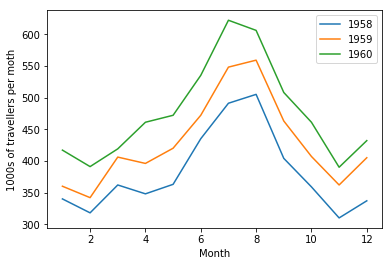

In [19]:
# You can probably just put this at the top of every notebook you write
# Adding it here for completeness
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Load airtravel data
air_travel = np.loadtxt("airtravel.csv", skiprows=6, usecols=[1,2,3], delimiter=",")

mths = np.arange(1, 13)
plt.plot(mths, air_travel[:, 0], '-', label="1958")
plt.plot(mths, air_travel[:, 1], '-', label="1959")
plt.plot(mths, air_travel[:, 2], '-', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per moth")
plt.legend(loc="best")

You may not want to use lines to join the data points, but symbols like dots, crosses, etc. 

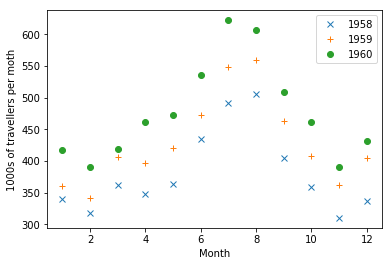

In [20]:
plt.figure()
plt.plot(mths, air_travel[:, 0], 'x', label="1958")
plt.plot(mths, air_travel[:, 1], '+', label="1959")
plt.plot(mths, air_travel[:, 2], 'o', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per moth")
plt.legend(loc="best")

We can also use dots **and** lines. Moreover, we can change the type of line: from full lines to dashed to dash-dot...

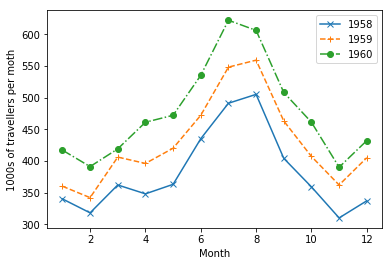

In [21]:
plt.figure()
plt.plot(mths, air_travel[:, 0], 'x-', label="1958")
plt.plot(mths, air_travel[:, 1], '+--', label="1959")
plt.plot(mths, air_travel[:, 2], 'o-.', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per moth")
plt.legend(loc="best")

Let's plot now a function we have defined. Such a function could be a damped sinewave which is written as

$$
y(t) = A\cdot \exp(-\lambda\cdot t)\cdot \cos(\omega\cdot t + \phi)
$$

where $A$ is the amplitude of the signal, $\lambda$ is the decay rate, $\omega=2\pi/f$ is the angular frequency, and $\phi$ is a phase angle. In numpy, the function could be written as
```python
def damped_sine(time, amp, decay, omega, phi):
    """Damped sine function.
    Parameters
    -----------
    time: array
        An array of time steps
    amp: float
        Amplitude of the signal
    lambda: float
        The decay rate
    omega: float
        The angular frequency
    phi: float
        The phase angle
    """
    return amp*np.exp(-decay*t)*np.cos(omega*t + phi)
```    



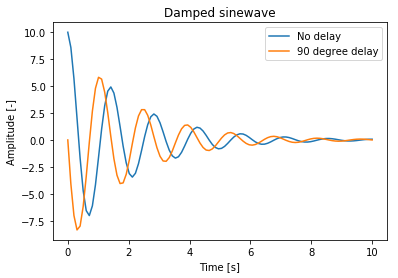

In [22]:
def damped_sine(time, amp, decay, omega, phi):
    """Damped sine function.
    Parameters
    -----------
    time: array
        An array of time steps
    amp: float
        Amplitude of the signal
    lambda: float
        The decay rate
    omega: float
        The angular frequency
    phi: float
        The phase angle
    """
    return amp*np.exp(-decay*t)*np.cos(omega*t + phi)

t = np.linspace(0, 10, 100)
amp = 10.
decay = .5
omega = 2*np.pi*70
phi = 0.
plt.figure()
plt.plot(t, damped_sine(t, amp, decay, omega, phi), '-', label="No delay")
plt.plot(t, damped_sine(t, amp, decay, omega, np.deg2rad(90.)), '-', label="90 degree delay")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [-]")
plt.title("Damped sinewave")
plt.legend(loc="best")

### Useful matpltolib 2D plot commands

The commands used previously have stacks of options and documentation. Check it out here:

* [`plt.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
* [`plt.xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.xlabel)
* [`plt.ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.ylabel)
* [`plt.title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.title.plot)
* [`plt.legend`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.legend)




## Looking at some actual data

The [Daymet service](https://daymet.ornl.gov/) provides a number of daily interpolated weather data over North America. We can order some data using an API, and get a CSV file to download. The API takes 5 pieces of information:

* The Latitude in decimal degrees (e.g. 45.4)
* The Longitude in decimal degrees (e.g. -115.0534)
* The variable(s) of interest
* The starting date in year-month-day format
* The end date in year-month-day format

The variables of interest are

* `dayl`: Daylight duration in seconds
* `prcp`: Precipitation in $mm\dot d^{-1}$
* `srad`: Daily average incident shortwave radiation ($W\dot m^{-2}$)
* `swe`: Snow water equivalent $kg\cdot  m^{-2}$
* `tmax`: Maximum daily temperature in $^{\circ}$ centigrade
* `tmin`: Minimum daily temperature in $^{\circ}$ centigrade
* `vp`: : Water vapour pressure in $Pa$

The URL is built up from you selection as follows (the backlash symbol `\` is used to split the line, there are no spaces):

    https://daymet.ornl.gov/single-pixel/api/data?\
    lat=45.4&lon=-115.0534&vars=tmax&start=2000-01-01&end=2010-01-01
    
Hopefully, you can see the pattern: different options are given after the `=` signs, so if you want another location, all you have to do is to change the values there and make the query. An example is given below.

In [23]:
import requests

# We open the output file, `daymet.csv`
with open("daymet_tmax.csv", 'w') as fp:
    # Define the URL with the parameters of interest
    url = "https://daymet.ornl.gov/single-pixel/api/" + \
        "data?lat=45.4&lon=-115.0534&vars=tmax&start=2000-01-01&end=2010-01-01"
    # make the HTTPS connection
    r = requests.get(url)
    # Read the data, convert it to UTF-8 and write it to file
    fp.write(r.content.decode("utf-8"))

# You can check the text file to see its contents, but we now
# (i) it's separated by commas
# (ii) the first 9 lines are metadata that we're not interested in.
temperature = np.loadtxt("daymet_tmax.csv", skiprows=9, delimiter=",")

# We expect to get ~10 years of data here, so 3650 daily records
print(temperature.shape)

(3650, 3)


#### Exercise

Select 4 locations in different regions of North America (e.g. Anchorage, Albuquerque, Seattle, Chicago). Request data on maximum temperature, precipitation and incident solar radiation for the years between 1981 to 2010, and plot in 3 different figures:

* Figure 1: The *mean daily temperature* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site
* Figure 2: The *mean daily precipitation* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site
* Figure 3: The *mean daily incident solar radiation* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site

In each plot, the mean value should be a full line, and the variation should be an envelope, visually similar to the plot shown below (clearly not identical!!!!)

![la niña plot](https://www.metoffice.gov.uk/binaries/content/gallery/mohippo/images/news/charts-and-images/compare_datasets_new_logo_1850-1900-20122017a-630.jpg)


Label each plot with a title, units and so on. Some useful functions to consider

* [`plt.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) Allows you to split a figure into several panels or subplots. In particular, pay attention to the `sharex` and `sharey` options that allow you to have the same scales for all plots so they can be directly compared.
* [`plt.fill_between`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) Allows you to fill the space between two curves. You may want to give the option `color=0.8` for a nice grey effect.

In order to calculate the statistics, note that you can reorder the data from the CSV provided by the server into a long array that can then be reshaped as $365\times\textsf{number of years}$ and then use the `.mean()` and `.std()` array methods.